In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
duplicate_rows = df[df.duplicated()]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No Duplicate Row Exists")
else:
    print("Duplicate Rows Found")
(duplicate_rows) 

    # Find one duplicate row
duplicate_row = duplicate_rows.iloc[0]

# Find the index of the first occurrence of this duplicate row
original_index = df[df.duplicated(keep='first')].index[0]

# Print the duplicate row and its original index
print(f"Duplicate Row:\n{duplicate_row}")
print(f"Original row index of this duplicate: {original_index}")

Duplicate Rows Found
Duplicate Row:
age          34.0
sex           0.0
cp            1.0
trestbps    118.0
chol        210.0
fbs           0.0
restecg       1.0
thalach     192.0
exang         0.0
oldpeak       0.7
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 15, dtype: float64
Original row index of this duplicate: 15


In [34]:
# Count the frequency of each unique row
# row_counts = df.groupby(df.columns.tolist()).size().reset_index(name='Count')

# # Merge the frequency (Count) back with the original dataset
# data_with_counts = pd.merge(df, row_counts, on=df.columns.tolist(), how='left')

# # Calculate weights based on the frequency (Count) — you can choose different ways to assign weights
# # Option 1: Assign weight as the count itself
# data_with_counts['Weight'] = data_with_counts['Count']

# # Option 2: Normalize the weights so they sum to 1 (if needed)
# data_with_counts['Weight'] = data_with_counts['Count'] / data_with_counts['Count'].sum()

# data_with_counts.drop('Count', inplace=True, axis=1)
# # Show the dataset with weights
# (data_with_counts)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Weight
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.00112
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.00112
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.00112
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.00112
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.00084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0.00084
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.00084
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0.00112
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,0.00084


In [35]:
# (data_with_counts).shape
# dropped_df = data_with_counts.drop_duplicates(inplace=False)
# dropped_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Weight
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.00112
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.00112
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.00112
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.00112
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.00084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0.00084
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,0.00084
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,0.00084
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,0.00084


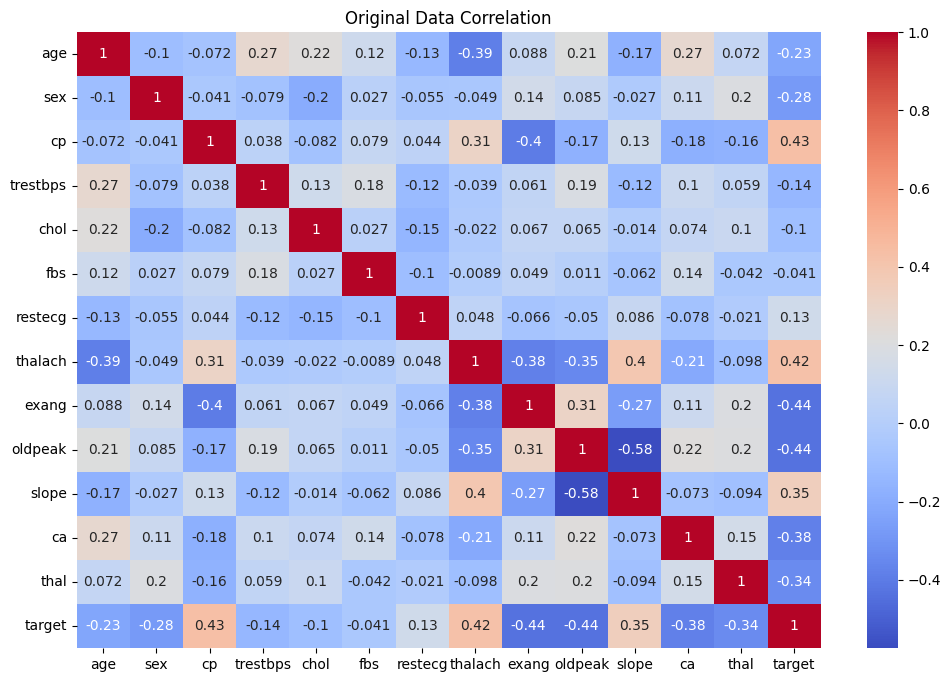

In [5]:
# 1. Original Data (Normal)
corr_normal = df.corr()

# 2. Data with Duplicates Dropped
data_without_duplicates = df.drop_duplicates()
corr_dropped_duplicates = data_without_duplicates.corr()

# 3. Data with Weight Column (Adding the Weight Column if not already added)


# Calculate correlation with weight column
# corr_with_weight = dropped_df.corr()


# Plot the original correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_normal, annot=True, cmap="coolwarm")
plt.title("Original Data Correlation")
plt.show()

# Plot the correlation matrix after dropping duplicates
# plt.figure(figsize=(12,8))
# sns.heatmap(corr_dropped_duplicates, annot=True, cmap="coolwarm")
# plt.title("Dropped Duplicates Correlation")
# plt.show()

# Plot the correlation matrix with weight column
# plt.figure(figsize=(12,8))
# sns.heatmap(corr_with_weight, annot=True, cmap="coolwarm")
# plt.title("With Weight Column Correlation")
# plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

copy_df = df.copy(deep=True)

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
numerical_data = ["age", "trestbps", "chol", "thalach", "oldpeak"]
# Loop through the numerical columns
for i in numerical_data:
    # Apply Min-Max Scaler first
    min_max_scaled_data = min_max_scaler.fit_transform(copy_df[[i]])
    
    # Then apply Standard Scaler
    standard_scaled_data = standard_scaler.fit_transform(min_max_scaled_data)
    
    # Flatten the array and assign it back to the dataframe
    copy_df[i] = standard_scaled_data.flatten()

copy_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal" , ]

# Apply OneHotEncoder to categorical columns
# encoder = OneHotEncoder(sparse_output=False)

# Transform the categorical columns and create a DataFrame
# encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_columns]), 
                        #   columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original numerical columns with the encoded categorical columns
# final_df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# (final_df)

In [17]:
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)

c:\Users\LENOVO\Desktop\ML_Projects\HeartDisease\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.17%


In [23]:
 
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[119  40]
 [ 18 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       159
           1       0.77      0.88      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



In [45]:
ans = model.predict([[71,0,0,112,149,0,1,125,0,1.6,1,0,2]])
ans

c:\Users\LENOVO\Desktop\ML_Projects\HeartDisease\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])